In [ ]:
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
file_path="/content/drive/MyDrive/Datasets/linear_regression_dataset.csv"


In [ ]:
df=pd.read_csv(file_path)
print(df)

           x1        x2        x3        x4        x5        x6        x7  \
0    0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1    0.241962 -1.913280 -1.724918 -0.562288 -1.012831  0.314247 -0.908024   
2   -0.544383  0.110923 -1.150994  0.375698 -0.600639 -0.291694 -0.601707   
3    0.208864 -1.959670 -1.328186  0.196861  0.738467  0.171368 -0.115648   
4    0.343618 -1.763040  0.324084 -0.385082 -0.676922  0.611676  1.031000   
..        ...       ...       ...       ...       ...       ...       ...   
295  0.330851  1.451001  0.879417 -1.077376  1.376496  0.313132  0.687066   
296  0.346710  2.511557 -1.840078 -0.032281  0.640543  0.123078 -0.113128   
297  0.958386  0.051661  0.229075  1.074318  0.224340  0.904018 -0.297482   
298 -0.831955 -0.638283 -0.815376 -1.066235  2.124771  1.331339  1.920368   
299  1.239584 -0.396230  1.068379  0.604121  2.303639 -1.479444  1.259233   

           x8        x9       x10       x11       x12         y  
0    0.76

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['y']).values
y = df['y'].values

scaler=StandardScaler()
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
beta_manual = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred_manual = X_test_bias @ beta_manual

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_sklearn = model.predict(X_test)

mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_manual = r2_score(y_test, y_pred_manual)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Manual Model - MSE: {mse_manual:.6f}, R2: {r2_manual:.6f}")
print(f"Sklearn Model - MSE: {mse_sklearn:.6f}, R2: {r2_sklearn:.6f}")

Manual Model - MSE: 0.664874, R2: 0.965365
Sklearn Model - MSE: 0.664874, R2: 0.965365


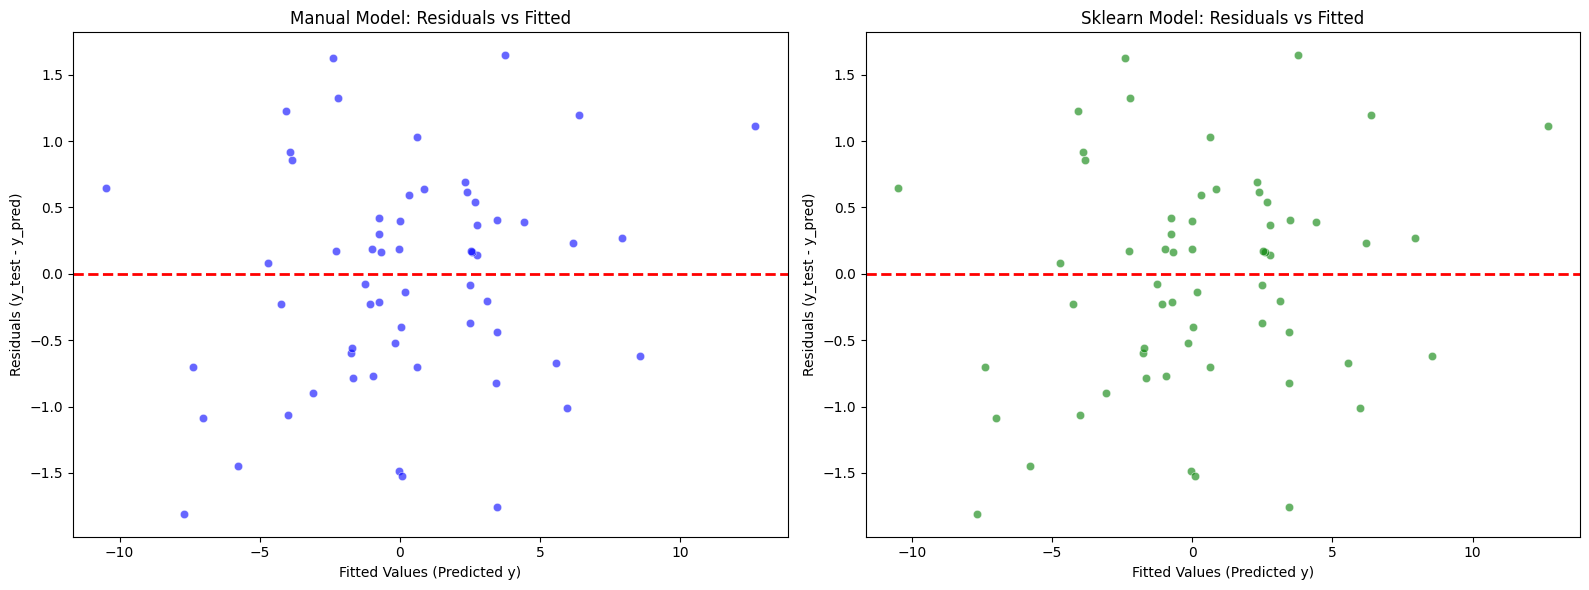

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals_manual = y_test - y_pred_manual
residuals_sklearn = y_test - y_pred_sklearn
fig,axes= plt.subplots(1,2, figsize=(16,6))
sns.scatterplot(x=y_pred_manual, y=residuals_manual, ax=axes[0], color='blue', alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Manual Model: Residuals vs Fitted')
axes[0].set_xlabel('Fitted Values (Predicted y)')
axes[0].set_ylabel('Residuals (y_test - y_pred)')

sns.scatterplot(x=y_pred_sklearn, y=residuals_sklearn, ax=axes[1], color='green', alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Sklearn Model: Residuals vs Fitted')
axes[1].set_xlabel('Fitted Values (Predicted y)')
axes[1].set_ylabel('Residuals (y_test - y_pred)')

plt.tight_layout()
plt.show()

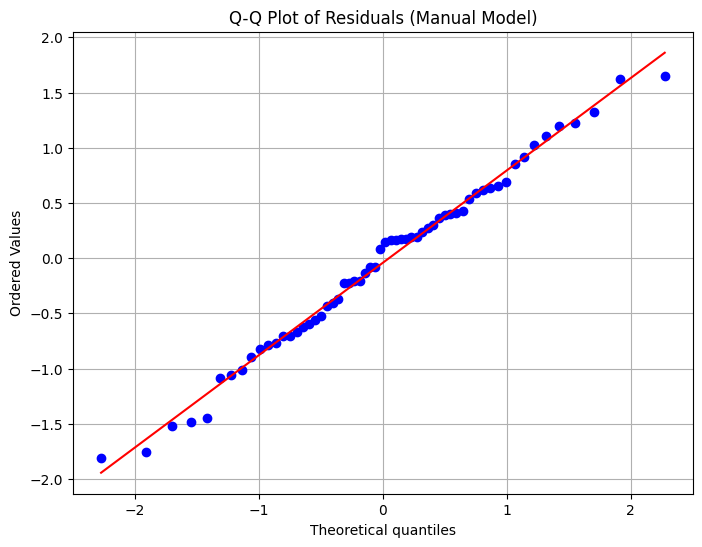

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = y_test - y_pred_manual

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Manual Model)')
plt.grid(True)
plt.show()